[nltk_data] Downloading package punkt to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.8s
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.8s
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.8s
[CV] END ....svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.8s
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.9s
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.9s
[CV] END ....svm__C=0.1, svm__gamma=auto, svm__kernel=linear; total time=   0.9s
[CV] END ......svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   1.0s[CV] END ......svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   1.0s
[CV] END ......svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   1.0s
[CV] END ......svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   1.0s

[CV] END ......svm__C=0.1, svm__gamma=scale, svm

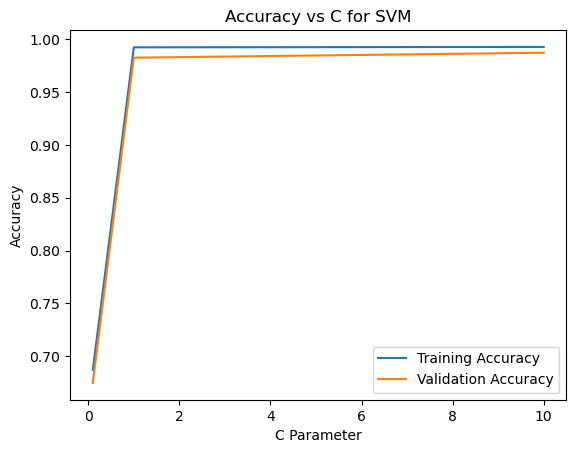

ValueError: x and y must have same first dimension, but have shapes (3,) and (6,)

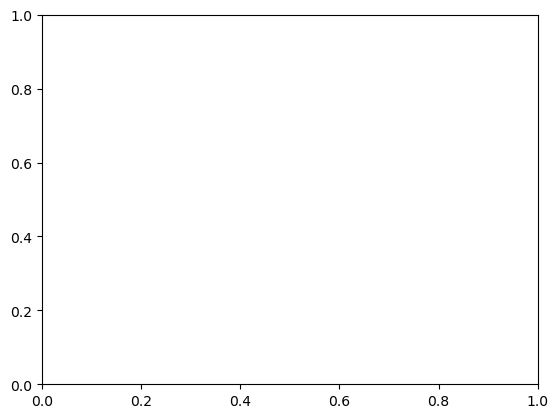

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Preprocessing Function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words])

# Load the Datasets
train_val_file_path = '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/AMAZON_FASHION_5.json'  # Update with your file path
# test_file_path = '/path/to/Luxury_Beauty.json'  # Update with your file path
train_val_df = pd.read_json(train_val_file_path, lines=True)
# test_df = pd.read_json(test_file_path, lines=True)

# Apply Preprocessing
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
train_val_df['processed_text'] = train_val_df['reviewText'].astype(str).apply(preprocess_text)
# test_df['processed_text'] = test_df['reviewText'].astype(str).apply(preprocess_text)

# Split the Training and Validation Data
X_train_val, y_train_val = train_val_df['processed_text'], train_val_df['overall']
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Pipeline and Grid Search Setup
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC())
])

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate on Validation Set
y_val_pred = grid_search.predict(X_val)
print("Validation Performance:")
print(classification_report(y_val, y_val_pred))

# # Evaluate on Test Set
# X_test, y_test = test_df['processed_text'], test_df['overall']
# y_test_pred = grid_search.predict(X_test)
# print("Test Performance:")
# print(classification_report(y_test, y_test_pred))

# Plot for Overfitting/Underfitting Analysis
train_accuracies = []
val_accuracies = []

for C in param_grid['svm__C']:
    pipeline.set_params(svm__C=C)
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_val_pred = pipeline.predict(X_val)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    val_accuracies.append(accuracy_score(y_val, y_val_pred))

plt.plot(param_grid['svm__C'], train_accuracies, label='Training Accuracy')
plt.plot(param_grid['svm__C'], val_accuracies, label='Validation Accuracy')
plt.xlabel('C Parameter')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs C for SVM')
plt.show()

for C in param_grid['svm__C']:
    pipeline.set_params(svm__C=C)
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_val_pred = pipeline.predict(X_val)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    val_accuracies.append(accuracy_score(y_val, y_val_pred))

plt.plot(param_grid['svm__C'], train_accuracies, label='Training Accuracy')
plt.plot(param_grid['svm__C'], val_accuracies, label='Validation Accuracy')
plt.xlabel('C Parameter')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs C for SVM')
plt.show()
